You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [5]:
import numpy as np
import matplotlib.pyplot as plt
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iters=1000):
        self.learning_rate = learning_rate
        self.iters = iters
    def fit(self, X, y):
        no_of_samples, no_of_features = X.shape 
        weights = np.zeros(no_of_features)
        b = 0
        for i in range(self.iters):
            # linear function
            temp = np.dot(X, weights) +b
            # sigmoid function
            y_pred = 1 / (1 + np.exp(-temp))
            # gradients calculation
            dw = (1 / no_of_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / no_of_samples) * np.sum(y_pred - y)
            # update parameters
            weights -= self.learning_rate * dw
            b-=        self.learning_rate * db

        self.weights = weights
        self.b = b
    # predict function which gives regression values
    def predict(self, X):
        temp = np.dot(X, self.weights) + self.b
        y_pred = 1 / (1 + np.exp(-temp))
        return y_pred
    def plotsigmoid(self, X):
        temp = np.dot(X, self.weights) + self.b
        y_pred = 1 / (1 + np.exp(-temp))
        plt.plot(temp, y_pred)
        plt.xlabel("X range")
        plt.ylabel("Y range")
        plt.title("Sigmoid function")
        plt.show()
    def classify(self, X):
        temp = np.dot(X, self.weights) + self.b
        y_pred = 1 / (1 + np.exp(-temp))
        y_pred = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred)
        


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=np.load("X.npy")
y=np.load("Y.npy")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)




0.6978998384491115


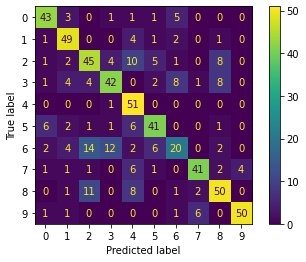

In [10]:
# // Implemented one vs all encoding.
# In this method each class is compared to all the other classes . in this example
# there are 10 classes so 10 classifiere will be there. the output of each classifier wll be probability score.
# The maximum of that will be the answer 


y_pred_all=[]
for i in range(10):
   lr  = LogisticRegression()
   lr.fit(X_train,y_train[:,i])
   y_pred_one=lr.predict(X_test)
   y_pred_all.append(y_pred_one)
z=np.array(y_pred_all)
z=z.T
y_pred_f=np.argmax(z, axis=1)
y_test_f=np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test_f, y_pred_f)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot() 
print(accuracy_score(y_pred_f, y_test_f))


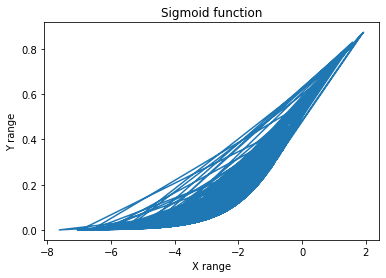

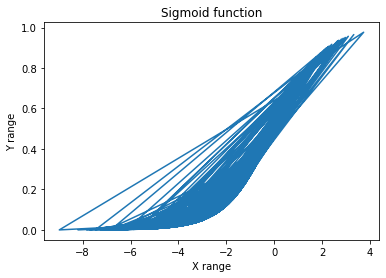

In [13]:
# //Plot sigmoid function
# sigmoid function for 3rd column(digit 2)
lr  = LogisticRegression()
lr.fit(X_train,y_train[:,2])
lr.plotsigmoid(X_test)

# sigmoid function for 5rd column(digit 4)
lr  = LogisticRegression()
lr.fit(X_train,y_train[:,4])
lr.plotsigmoid(X_test)  

In [ ]:
# // Implemented one vs all encoding.
# In this method each class is compared to all the just one other classes . in this example
# there are nc2 classifiers (45 classifier). each binary classifier will predict one class. store all the results
# in an array. the class whicgh got more votes among all 45 classifier is the result 
y_pred_all=[]
no_of_test_samples=X_test.shape[0]
freuqncy_pred= np.zeros((no_of_test_samples,10))
c=0
for i in range(10):
   for j in range(i+1,10):
      
      y_train_one_one=[]
      x_train_one_one=[]
      for k in range(np.shape(X_train)[0]):
          if y_train[k][i]==1:
            y_train_one_one.append(1)
            x_train_one_one.append(X_train[k])
          elif y_train[k][j]==1:
            y_train_one_one.append(0)
            x_train_one_one.append(X_train[k])
          else:
            pass
      
      x_train_one_one=np.array(x_train_one_one)
      y_train_one_one=np.array(y_train_one_one)
      # print(x_train_one_one.shape)
      # print(y_train_one_one)
      # print(y_train_one_one.shape)
      lr  = LogisticRegression()
      lr.fit(x_train_one_one,y_train_one_one)
      y_pred_one=lr.classify(X_test)
      for k in range(no_of_test_samples):
          if y_pred_one[k]==1:
            freuqncy_pred[k][i]+=1
          else:
            freuqncy_pred[k][j]+=1

y_pred_f=np.argmax(freuqncy_pred, axis=1)
y_test_f=np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred_f, y_test_f))      

0.752827140549273


In [39]:
from sklearn.linear_model import LogisticRegression
y_train_sa=np.argmax(y_train,axis=1)
y_test_sa=np.argmax(y_test,axis=1)
clf = LogisticRegression(max_iter=40000, multi_class='ovr')
clf.fit(X_train, y_train_sa)
y_pred=clf.predict(X_test)

print(accuracy_score(y_pred, y_test_sa))    





0.7075928917609047


In [ ]:
The accuracy Compared
One vs all - 0.6978998384491115
One vs one - 0.752827140549273
Sklearn Solver 0.7075928917609047